<h2 style="text-align: center;" > <strong>SBA Loand Default Prediction</strong></h2>

### Problem
The default rate for the 10-year period ending in 2008, when nearly 1 in 4 (24.7%) SBA loans weren’t paid back. It means that SBA would have loss due to Small Business couldn’t make repayment

### Goals
Being able to early detected of SBA loan default could reduce the risk of loss for Small Business Administration.

### Step of Work
**Step 2** : In this step, I would to analyst and Visualization the dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable as stb
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv(r'Clean_SBA_Loan.csv')
df.head()

,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,DisbursementGross,MIS_Status,GrAppv,sector,isFranchise,sameState,backRealEstate,Portion
0,2006,162,2,2.0,0,0,1,N,N,253400.0,P I F,253400.0,Retail_trade,Franchise,0,0,0.75
1,2006,126,7,1.0,0,0,1,N,N,137300.0,P I F,137300.0,Accommodation_food_serv,No Franchise,0,0,0.85
2,2006,83,18,2.0,5,23,1,Y,N,438541.0,P I F,100000.0,Educational_services,No Franchise,0,0,0.50
3,2006,84,4,1.0,0,4,1,Y,N,51440.0,P I F,35000.0,Construction,No Franchise,1,0,0.50
4,2006,60,3,1.0,0,0,1,N,N,50000.0,P I F,50000.0,RE_rental_leasing,No Franchise,1,0,0.85


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334056 entries, 0 to 334055
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ApprovalFY         334056 non-null  int64  
 1   Term               334056 non-null  int64  
 2   NoEmp              334056 non-null  int64  
 3   NewExist           334056 non-null  float64
 4   CreateJob          334056 non-null  int64  
 5   RetainedJob        334056 non-null  int64  
 6   UrbanRural         334056 non-null  int64  
 7   RevLineCr          334056 non-null  object 
 8   LowDoc             334056 non-null  object 
 9   DisbursementGross  334056 non-null  float64
 10  MIS_Status         334056 non-null  object 
 11  GrAppv             334056 non-null  float64
 12  sector             334056 non-null  object 
 13  isFranchise        334056 non-null  object 
 14  sameState          334056 non-null  int64  
 15  backRealEstate     334056 non-null  int64  
 16  Po

In [4]:
## Checking for missing value
df.isnull().sum()

ApprovalFY           0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementGross    0
MIS_Status           0
GrAppv               0
sector               0
isFranchise          0
sameState            0
backRealEstate       0
Portion              0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApprovalFY,334056.0,2005.848825,2.764577,1994.00,2004.0,2006.0,2007.000000,2014.0
Term,334056.0,75.795648,49.841381,1.00,48.0,84.0,84.000000,527.0
NoEmp,334056.0,7.471858,17.081044,0.00,2.0,3.0,7.000000,1500.0
NewExist,334056.0,1.272146,0.445065,1.00,1.0,1.0,2.000000,2.0
CreateJob,334056.0,1.656564,13.926810,0.00,0.0,0.0,1.000000,5085.0
RetainedJob,334056.0,5.537694,15.087415,0.00,1.0,2.0,6.000000,4441.0
UrbanRural,334056.0,1.175956,0.380783,1.00,1.0,1.0,1.000000,2.0
DisbursementGross,334056.0,148739.991639,277177.832106,4000.00,25366.0,58763.0,149000.000000,11446325.0
GrAppv,334056.0,123713.840572,256779.756306,1000.00,25000.0,50000.0,100000.000000,5000000.0
sameState,334056.0,0.346181,0.475753,0.00,0.0,0.0,1.000000,1.0


In [6]:
df.describe(include='O').T

,count,unique,top,freq
RevLineCr,334056,2,Y,188879
LowDoc,334056,2,N,332780
MIS_Status,334056,2,P I F,241600
sector,334056,20,Retail_trade,56448
isFranchise,334056,2,No Franchise,324495


In [7]:
SBA_LoanDESC = []

for i in df.columns:
    SBA_LoanDESC.append([
    i,
    df[i].dtypes,
    df[i].isna().sum(),
    (((df[i].isna().sum())/len(df))*100).round(2),
    df[i].nunique(),
    df[i].drop_duplicates().sample(2).values
    ])

pd.DataFrame(data=SBA_LoanDESC, columns=['feature_name', 'type', 'Null', 'Percentage Null', 'No Unique', 'Example Unique'])

,feature_name,type,Null,Percentage Null,No Unique,Example Unique
0,ApprovalFY,int64,0,0.0,21,"[2001, 2002]"
1,Term,int64,0,0.0,327,"[80, 21]"
2,NoEmp,int64,0,0.0,289,"[34, 260]"
3,NewExist,float64,0,0.0,2,"[2.0, 1.0]"
4,CreateJob,int64,0,0.0,156,"[77, 153]"
5,RetainedJob,int64,0,0.0,247,"[66, 498]"
6,UrbanRural,int64,0,0.0,2,"[2, 1]"
7,RevLineCr,object,0,0.0,2,"[N, Y]"
8,LowDoc,object,0,0.0,2,"[Y, N]"
9,DisbursementGross,float64,0,0.0,95880,"[134406.0, 19627.0]"


### Data Analyst and Visualization

### `MIS_Status`

In [8]:
# This code aim to show the frequency of MIS_Status
df.stb.freq(['MIS_Status'])

,MIS_Status,count,percent,cumulative_count,cumulative_percent
0,P I F,241600,72.323203,241600,72.323203
1,CHGOFF,92456,27.676797,334056,100.000000


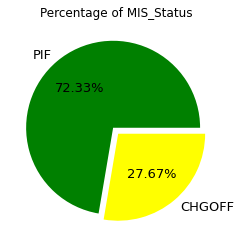

In [9]:
#Here are visualization of MIS_Status using pie chart
percentage = [72.32, 27.67]
label = ['PIF', 'CHGOFF']

plt.pie( percentage, labels=label,
        colors=[ 'green', 'yellow'],
        startangle=0,
        textprops ={
            'size': 13,
            'color':'black'
        },
        autopct='%1.2f%%',
        radius=1,
        explode=(.05, .04)
)
plt.title('Percentage of MIS_Status')
# plt.savefig('MIS_Status.png')
plt.show()

- Percentage of borrower who pain in full (PIF) around 72.33% while borrower who charge off around 27.67%

### `Term`

In [8]:
#sidetable
df.stb.freq(['backRealEstate'])

,backRealEstate,count,percent,cumulative_count,cumulative_percent
0,0,322558,96.558062,322558,96.558062
1,1,11498,3.441938,334056,100.000000


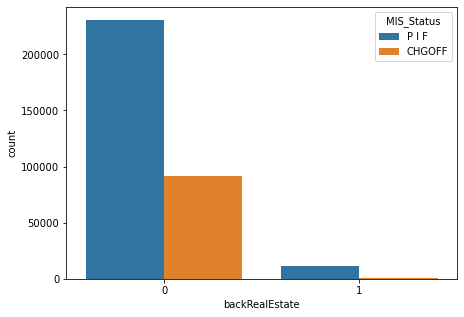

In [9]:
plt.figure(figsize=(7,5))
sns.countplot(x = df['backRealEstate'], hue=df['MIS_Status'])
# plt.savefig('Term.png')
plt.show()

In [12]:
((pd.crosstab(index=df['backRealEstate'], columns=df['MIS_Status'], normalize='index'))*100).round(2)

MIS_Status,CHGOFF,P I F
backRealEstate,,
0,28.51,71.49
1,4.41,95.59


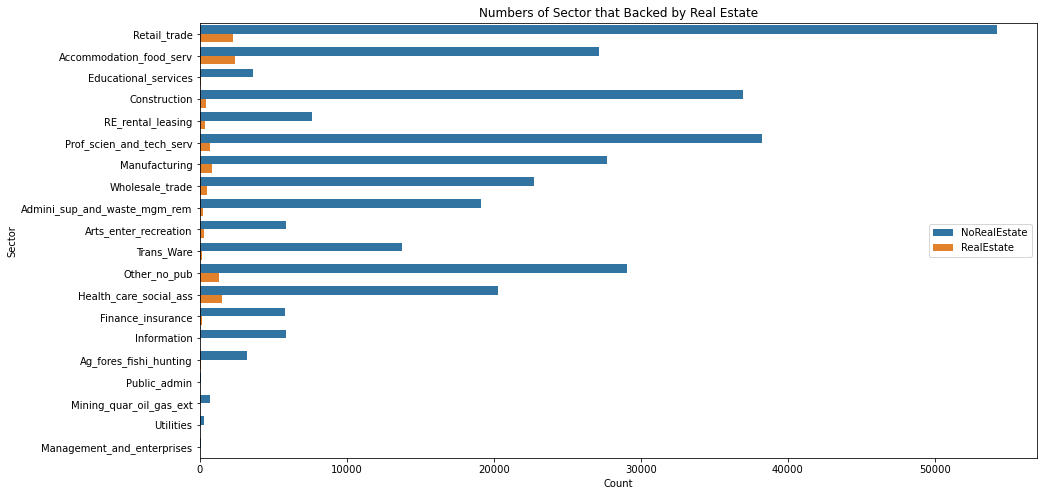

In [17]:
## Visualization
plt.figure(figsize=(15,8))
sns.countplot(y=df['sector'], hue=df['backRealEstate'])
plt.title('Numbers of Sector that Backed by Real Estate')
plt.xlabel('Count')
plt.ylabel('Sector')
plt.legend(['NoRealEstate','RealEstate'], loc='right')
plt.show()

- Loan backed up by real estate has lower CHGOFF (4.41%) rather than not backed up by real estate (28.51%)

### `NoEmp`

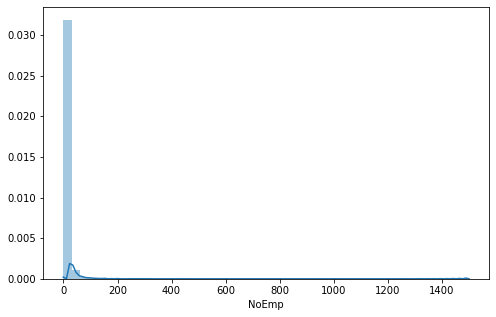

In [18]:
plt.figure(figsize=(8,5))
sns.distplot(df['NoEmp'])
plt.show()

In [20]:
df['NoEmp'].groupby(df['NewExist']).median()

NewExist
1.0    4
2.0    2
Name: NoEmp, dtype: int64

- Median number of employees of Existing Business was greater than NewBusiness. 

### `NewExist`

In [21]:
df.stb.freq(['NewExist'])

,NewExist,count,percent,cumulative_count,cumulative_percent
0,1.0,243144,72.785401,243144,72.785401
1,2.0,90912,27.214599,334056,100.000000


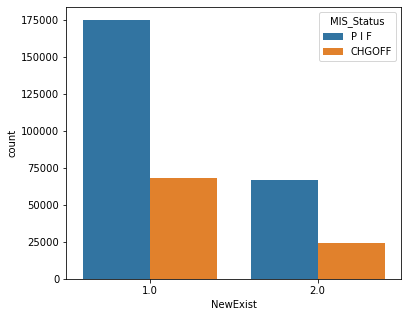

In [22]:
plt.figure(figsize=(6,5))
sns.countplot(df['NewExist'], hue=df['MIS_Status'])
plt.show()

In [23]:
((pd.crosstab(index=df['NewExist'], columns=df['MIS_Status'], normalize='index', margins=True))*100).round(2)

MIS_Status,CHGOFF,P I F
NewExist,,
1.0,27.99,72.01
2.0,26.83,73.17
All,27.68,72.32


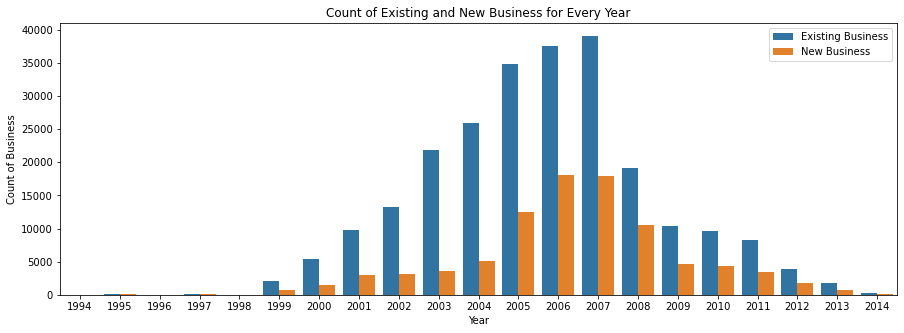

In [24]:
# Visualization of Count Existing Business and New Business for Every Year
plt.figure(figsize=(15,5))
sns.countplot(x=df['ApprovalFY'], hue=df['NewExist'])
plt.title('Count of Existing and New Business for Every Year')
plt.xlabel('Year')
plt.ylabel('Count of Business')
plt.legend(['Existing Business','New Business'], loc='best')
plt.show()

- Whether the business was Existing Business or New Bussiness, both of them has same risk of CHGOFF

### `UrbanRural`

In [26]:
#sidetable
df.stb.freq(['UrbanRural'])
#This code aims to find out the percentage of UrbanRural
#It appears that Urban have a higher percentage around 80.48% 

,UrbanRural,count,percent,cumulative_count,cumulative_percent
0,1,275277,82.404447,275277,82.404447
1,2,58779,17.595553,334056,100.000000


In [27]:
((pd.crosstab(index=df['MIS_Status'], columns=df['UrbanRural'], normalize='index', margins=True))*100).round(2)

## This code aim to know ==> most of the defaults loan come from what area ? 

UrbanRural,1,2
MIS_Status,,
CHGOFF,86.24,13.76
P I F,80.94,19.06
All,82.40,17.60


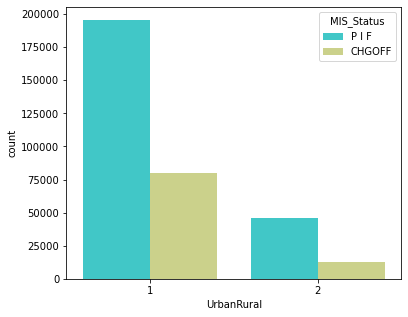

In [28]:
# Visualization 
plt.figure(figsize=(6,5))
sns.countplot(df['UrbanRural'], hue=df['MIS_Status'], palette='rainbow')
plt.show()

- Most of CHGOFF come from Urban with percentage 86.24%

### `RevLineCr`

In [30]:
#sidetable
df.stb.freq(['RevLineCr'])
#This code aims to find out the percentage of RevLineCr
#It appears that mostly small business revolving line of credit with percentage around 56.54%

,RevLineCr,count,percent,cumulative_count,cumulative_percent
0,Y,188879,56.541119,188879,56.541119
1,N,145177,43.458881,334056,100.000000


In [31]:
((pd.crosstab(index=df['MIS_Status'], columns=df['RevLineCr'], normalize='columns', margins=True))*100).round(2)

## This code aim to know ==> is small business with revolving line credit (Y) has higher risk of default?

RevLineCr,N,Y,All
MIS_Status,,,
CHGOFF,29.52,26.26,27.68
P I F,70.48,73.74,72.32


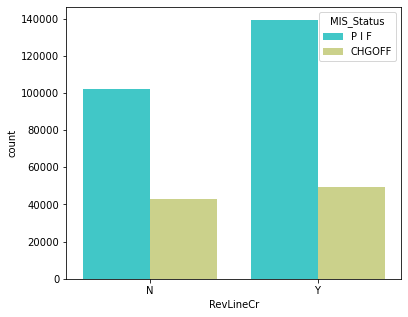

In [32]:
# Visualization 
plt.figure(figsize=(6,5))
sns.countplot(df['RevLineCr'], hue=df['MIS_Status'], palette='rainbow')
plt.show()

- Small busines with revolving line of credit has lower risk of default loan with percentage 26.26%

### `LowDoc`

In [33]:
#sidetable
df.stb.freq(['LowDoc'])
#This code aims to find out the percentage of LowDoc
#It appears that mostly small business with no LowDoc with percentage around 99.61%

,LowDoc,count,percent,cumulative_count,cumulative_percent
0,N,332780,99.618028,332780,99.618028
1,Y,1276,0.381972,334056,100.000000


In [35]:
((pd.crosstab(index=df['MIS_Status'], columns=df['LowDoc'], normalize='columns'))*100).round(2)

## This code aim to know ==> is LowDoc feature could be indicate as default risk?

LowDoc,N,Y
MIS_Status,,
CHGOFF,27.72,15.44
P I F,72.28,84.56


In [37]:
#This code aim to make a DataFrame to visualize
doc = {
    'CHGOFF' : [27.72, 15.44],
    'PIF' : [72.28, 84.56],
    'Status':['N', 'Y']
}


pd.DataFrame(data=doc)

,CHGOFF,PIF,Status
0,27.72,72.28,N
1,15.44,84.56,Y


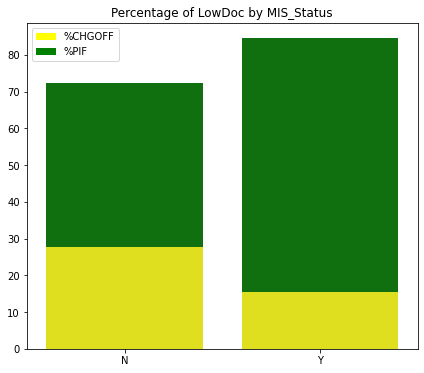

In [38]:
#Here are the visualize of percentage of LowDoc & MIS_Status using stacked bar
plt.figure(figsize=(7,6))
#plot 1 - backgroud - PIF
sns.barplot(x=doc['Status'], y=doc['PIF'], color='green')

#plot 2 - CHGOFF
sns.barplot(x=doc['Status'], y=doc['CHGOFF'], color='yellow')

#Setting the legend
topbar = plt.Rectangle((0,0),1,1,fc="green", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='yellow',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['%CHGOFF', '%PIF'], loc='best', ncol = 1, prop={'size':10})

plt.title('Percentage of LowDoc by MIS_Status')
# plt.savefig('JobInvolvement.png')
plt.show()

- Mostly for small business that has default loan (CHGOFF) didn't come from LowDoc. The percentage of LowDoc that CHGOFF only 15.44%

### `DisbursementGross`

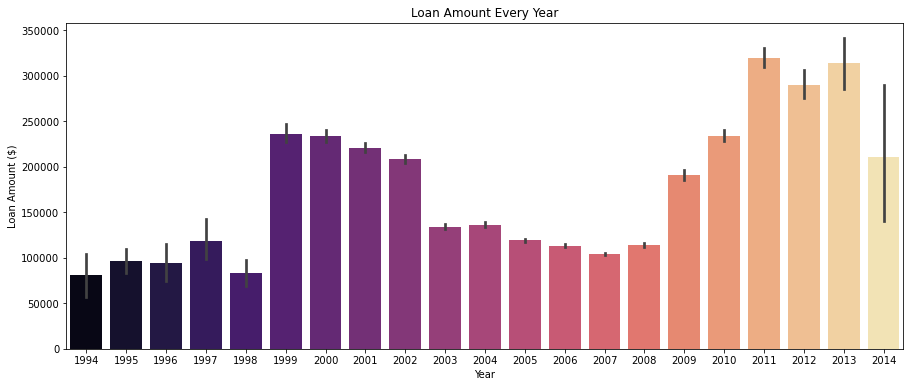

In [8]:
# Visualisasi
plt.figure(figsize=(15,6))
sns.barplot(x=df['ApprovalFY'], y=df['DisbursementGross'], palette='magma')
plt.title('Loan Amount Every Year')
plt.xlabel('Year')
plt.ylabel('Loan Amount ($)')
plt.show()

In [9]:
df['DisbursementGross'].groupby(df['MIS_Status']).median()

MIS_Status
CHGOFF    50000.0
P I F     63022.0
Name: DisbursementGross, dtype: float64

In [10]:
## Binning to gain more insight
bin_disGross=[3999.0, 150000.0, 11446325.0] #range kelompok (4000.0-150000.0, 150001.0-11446325.0)
label = ['low','high']
df['disGross_bin'] = pd.cut(df['DisbursementGross'], bins=bin_disGross, labels=label)

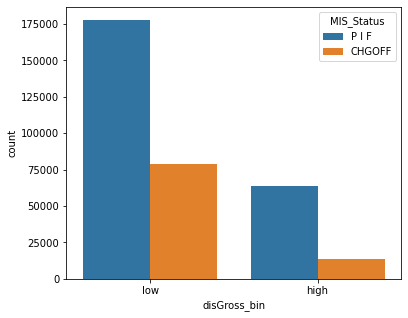

In [11]:
#countplot visualization
plt.figure(figsize=(6,5))
sns.countplot(df['disGross_bin'], hue=df['MIS_Status'])
# plt.savefig('Disbursement.png')
plt.show()

In [12]:
((pd.crosstab(index=df['disGross_bin'], columns=df['MIS_Status'], normalize='index'))*100).round(2)

## This code aims to determine which disbursed loans that experience a default loan

MIS_Status,CHGOFF,P I F
disGross_bin,,
low,30.67,69.33
high,17.79,82.21


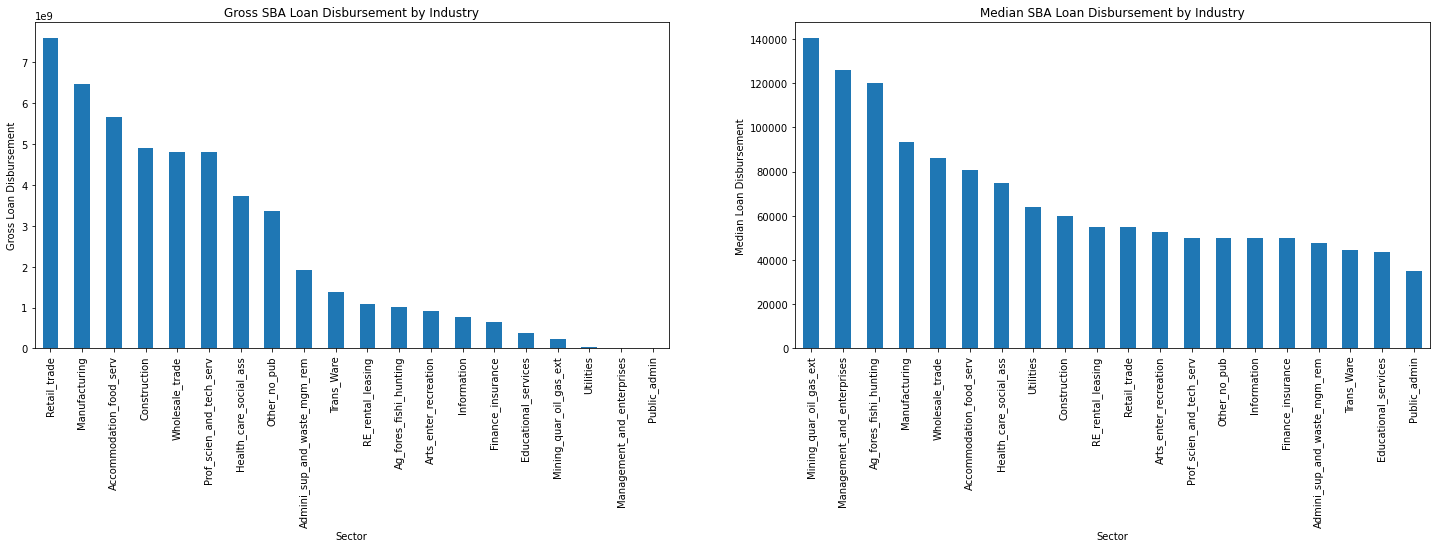

In [44]:
## Visualization
plt.figure(figsize=(25,6))

#Gross SBA Loan Disbursement by Industry
plt.subplot(1,2,1)
df['DisbursementGross'].groupby(df['sector']).sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Gross SBA Loan Disbursement by Industry')
plt.xlabel('Sector')
plt.ylabel('Gross Loan Disbursement')

#Median SBA Loan Disbursement by Industry
plt.subplot(1,2,2)
df['DisbursementGross'].groupby(df['sector']).median().sort_values(ascending=False).plot(kind='bar')
plt.title('Median SBA Loan Disbursement by Industry')
plt.xlabel('Sector')
plt.ylabel('Median Loan Disbursement')

plt.show()

- Median of DisbursementGross that CHGOFF was 50000.0 while DisbursementGross that PIF was 63022.0
- After binning,  CHGOFF with low DisbursementGross has higher percentage 30.67% rather than high DisbursementGross. Its means that mostly CHGOFF come from small business with low DisbursementGross
- Retail trade and Manufacturing has significantly loan disbursement compare to another sector
- Although Mining, quarrying, and oil and gas extraction has total amount loan disbursement little compare to another, but they has highest median loan disbursement

### `GrAppv`
Gross amount of loan approved by bank

In [45]:
## This code aims to know the median of gross amount of loan approved by bank groupby sector
df['GrAppv'].groupby(df['sector']).median().sort_values(ascending=False)

sector
Mining_quar_oil_gas_ext         100000.0
Ag_fores_ﬁshi_hunting           100000.0
Management_and_enterprises       75000.0
Manufacturing                    60000.0
Accommodation_food_serv          55000.0
Retail_trade                     50000.0
Utilities                        50000.0
Health_care_social_ass           50000.0
Wholesale_trade                  50000.0
Construction                     40000.0
Arts_enter_recreation            40000.0
Prof_scien_and_tech_serv         35000.0
Other_no_pub                     35000.0
RE_rental_leasing                35000.0
Information                      35000.0
Finance_insurance                35000.0
Trans_Ware                       31500.0
Educational_services             30000.0
Admini_sup_and_waste_mgm_rem     30000.0
Public_admin                     25000.0
Name: GrAppv, dtype: float64

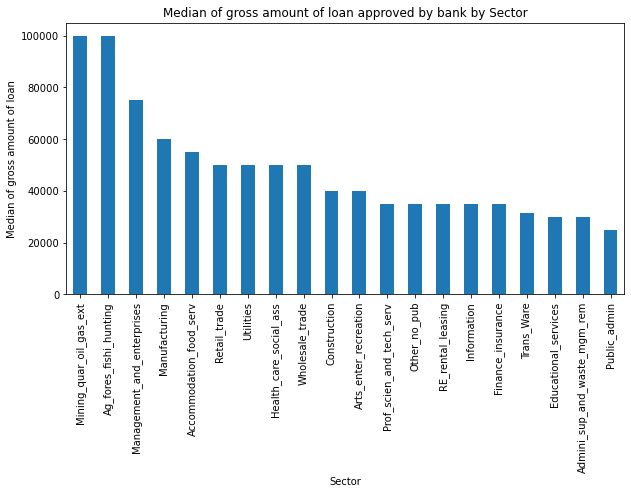

In [47]:
## Visualization
plt.figure(figsize=(10,5))
df['GrAppv'].groupby(df['sector']).median().sort_values(ascending=False).plot(kind='bar')
plt.title('Median of gross amount of loan approved by bank by Sector')
plt.xlabel('Sector')
plt.ylabel('Median of gross amount of loan')
plt.show()

-  Mining, quarrying, and oil and gas extraction and Agriculture, forestry, fishing and hunting has highest median of Gross amount of loan approved by bank around 100000.0

### `sector`

In [13]:
#sidetable
df.stb.freq(['sector'])
#This code aims to find out the percentage of sector 
#It appears that Retail trade has highest percentage around 16.89%

,sector,count,percent,cumulative_count,cumulative_percent
0,Retail_trade,56448,16.897766,56448,16.897766
1,Prof_scien_and_tech_serv,38920,11.650741,95368,28.548507
2,Construction,37400,11.195728,132768,39.744234
3,Other_no_pub,30336,9.081112,163104,48.825347
4,Accommodation_food_serv,29613,8.864681,192717,57.690028
5,Manufacturing,28520,8.537491,221237,66.227519
6,Wholesale_trade,23273,6.966796,244510,73.194315
7,Health_care_social_ass,21845,6.539323,266355,79.733637
8,Admini_sup_and_waste_mgm_rem,19361,5.795735,285716,85.529372
9,Trans_Ware,13922,4.167565,299638,89.696937


In [14]:
#crosstab between sector and MIS_Status
df_sector = pd.crosstab(index=df['sector'], columns=df['MIS_Status'])

#Default percentage
df_sector['%PercentDefault'] = df_sector['CHGOFF']/(df_sector['CHGOFF']+df_sector['P I F'])
df_sector

MIS_Status,CHGOFF,P I F,%PercentDefault
sector,,,
Accommodation_food_serv,8347,21266,0.281869
Admini_sup_and_waste_mgm_rem,5326,14035,0.275089
Ag_fores_ﬁshi_hunting,503,2851,0.149970
Arts_enter_recreation,1804,4429,0.289427
Construction,11433,25967,0.305695
Educational_services,1074,2668,0.287012
Finance_insurance,2082,3881,0.349153
Health_care_social_ass,3326,18519,0.152255
Information,1762,4163,0.297384


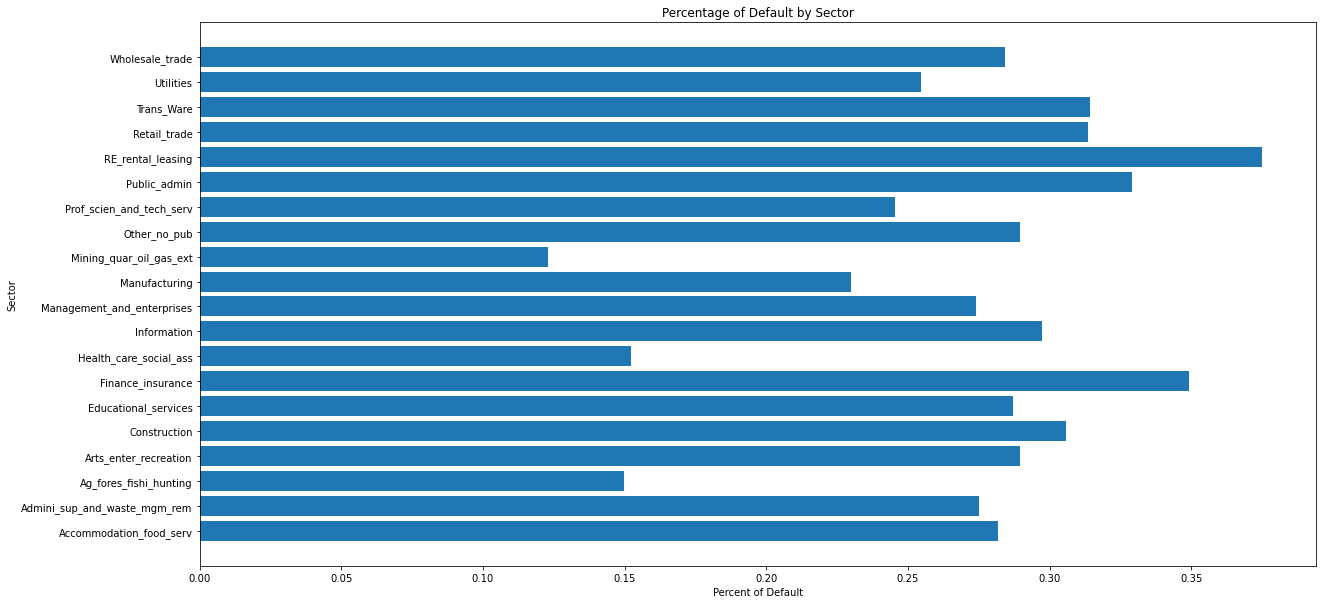

In [15]:
## Visualization
plt.figure(figsize=(20,10))
plt.barh(df_sector.index, df_sector['%PercentDefault'])
plt.title('Percentage of Default by Sector')
plt.xlabel('Percent of Default')
plt.ylabel('Sector')
# plt.savefig('Sector.png')
plt.show()

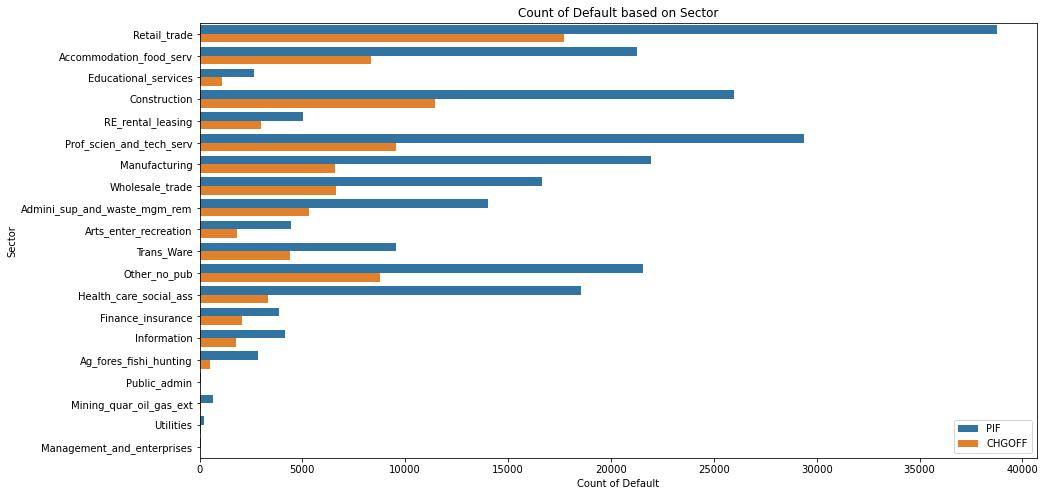

In [52]:
## Visualization
plt.figure(figsize=(15,8))
sns.countplot(y=df['sector'], hue=df['MIS_Status'])
plt.title('Count of Default based on Sector')
plt.xlabel('Count of Default')
plt.ylabel('Sector')
plt.legend(['PIF','CHGOFF'], loc='lower right')
# plt.savefig('Sector.png')
plt.show()

- Sector with highest number of loan was Retail trade with percentage around 16.89%, followed by Professional, scientific, and technical services and Construction with each percentage 11.65% and 11.19%
- Sector that has highest default was Real estate and rental and leasing (37.51%), followed by Finance and Insurance (34.91%) and Transportation and warehousing (31.44%)
- Sector Mining, quarrying, and oil and gas extraction (12.28%) and Sector Health care provider (15.22%) appear to be doing well

### `ApprovalFY`

In [8]:
#sidetable
df.stb.freq(['ApprovalFY'])
#This code aims to find out the percentage of ApprovalFY 
#It appears that 2007 has highest percentage around 17.07%

,ApprovalFY,count,percent,cumulative_count,cumulative_percent
0,2007,57028,17.071389,57028,17.071389
1,2006,55606,16.645712,112634,33.717101
2,2005,47292,14.156908,159926,47.874009
3,2004,30929,9.258627,190855,57.132636
4,2008,29650,8.875757,220505,66.008394
5,2003,25406,7.605312,245911,73.613705
6,2002,16396,4.908159,262307,78.521865
7,2009,15079,4.513914,277386,83.035778
8,2010,14017,4.196003,291403,87.231781
9,2001,12739,3.813432,304142,91.045214


In [9]:
#crosstab between sector and MIS_Status
df_year = pd.crosstab(index=df['ApprovalFY'], columns=df['MIS_Status'])

#Default percentage
df_year['%Percent_Default'] = df_year['CHGOFF']/(df_year['CHGOFF']+df_year['P I F'])
df_year

MIS_Status,CHGOFF,P I F,%Percent_Default
ApprovalFY,,,
1994,1,16,0.058824
1995,3,114,0.025641
1996,4,31,0.114286
1997,6,160,0.036145
1998,14,57,0.197183
1999,289,2411,0.107037
2000,837,6055,0.121445
2001,1693,11046,0.132899
2002,2168,14228,0.132227


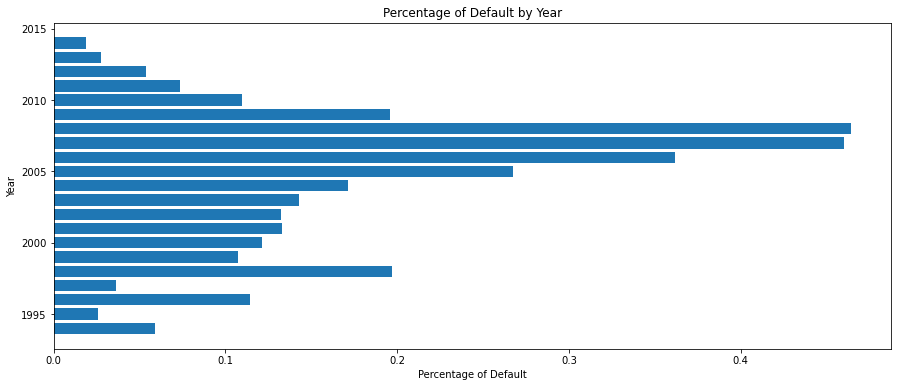

In [10]:
#Visualization
plt.figure(figsize=(15,6))
plt.barh(df_year.index, df_year['%Percent_Default'])
plt.title('Percentage of Default by Year')
plt.xlabel('Percentage of Default')
plt.ylabel('Year')
plt.show()

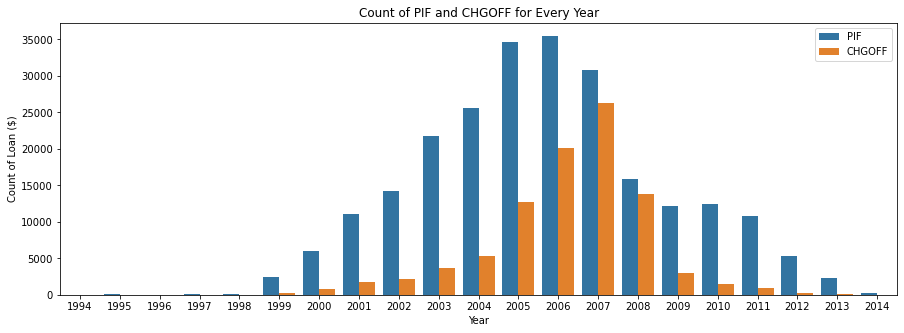

In [56]:
# Visualisasi
plt.figure(figsize=(15,5))
sns.countplot(x=df['ApprovalFY'], hue=df['MIS_Status'])
plt.title('Count of PIF and CHGOFF for Every Year')
plt.xlabel('Year')
plt.ylabel('Count of Loan ($)')
plt.legend(['PIF','CHGOFF'], loc='best')
plt.show()

- Year with highest number of loan was 2007 (17.07%), followed by 2006(16.64%) and 2005(14.15%)
- Year where has highest Percentage of default loan was 2008 (46.41%), followed by 2007(46.02%)
- in 2006-2008 there was an increase in defaults. This is due to the recession that occured in that year

### `isFranchise`

In [58]:
#sidetable
df.stb.freq(['isFranchise'])
#This code aims to find out the percentage of isFranchise 
#It appears that No Franchise has highest percentage around 97.13%

,isFranchise,count,percent,cumulative_count,cumulative_percent
0,No Franchise,324495,97.137905,324495,97.137905
1,Franchise,9561,2.862095,334056,100.000000


In [60]:
((pd.crosstab(index=df['isFranchise'], columns=df['MIS_Status'], normalize='columns'))*100).round(2)

MIS_Status,CHGOFF,P I F
isFranchise,,
Franchise,2.84,4.2
No Franchise,97.16,95.8


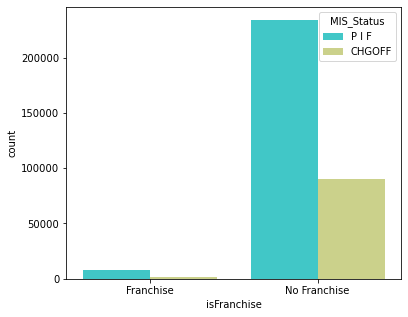

In [59]:
# Visualization
plt.figure(figsize=(6,5))
sns.countplot(df['isFranchise'], hue=df['MIS_Status'], palette='rainbow')
plt.show()

- Mostly small business that CHGOFF didn't come from Franchise

### `sameState`

In [16]:
#sidetable
df.stb.freq(['sameState'])
#This code aims to find out the percentage of sameState 
#It appears that different State(0) has highest percentage around 65.38%

,sameState,count,percent,cumulative_count,cumulative_percent
0,0,218412,65.381852,218412,65.381852
1,1,115644,34.618148,334056,100.000000


In [19]:
((pd.crosstab(index=df['sameState'], columns=df['MIS_Status'], normalize='columns'))*100).round(2)

MIS_Status,CHGOFF,P I F
sameState,,
0,77.98,60.56
1,22.02,39.44


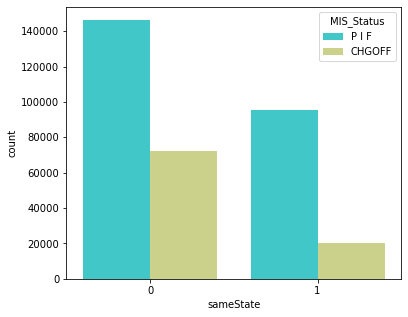

In [20]:
# Visualization
plt.figure(figsize=(6,5))
sns.countplot(df['sameState'], hue=df['MIS_Status'], palette='rainbow')
# plt.savefig('sameState.png')
plt.show()

- Mostly small business that CHGOFF come from different State with percentage 77.98%

### `Portion`

In [65]:
df['Portion'].groupby(df['MIS_Status']).mean()

MIS_Status
CHGOFF    0.575369
P I F     0.577951
Name: Portion, dtype: float64

In [63]:
# This code aims to know which sector that has high portion
df['Portion'].groupby(df['sector']).mean().sort_values(ascending=False)

sector
Ag_fores_ﬁshi_hunting           0.690711
Mining_quar_oil_gas_ext         0.632137
Accommodation_food_serv         0.627675
Arts_enter_recreation           0.601150
Health_care_social_ass          0.595870
Manufacturing                   0.595689
Retail_trade                    0.586010
Educational_services            0.583444
Public_admin                    0.576829
Other_no_pub                    0.575890
Information                     0.573000
Wholesale_trade                 0.572880
Management_and_enterprises      0.566438
Utilities                       0.565340
RE_rental_leasing               0.557050
Finance_insurance               0.556301
Trans_Ware                      0.554576
Admini_sup_and_waste_mgm_rem    0.552377
Prof_scien_and_tech_serv        0.552264
Construction                    0.542746
Name: Portion, dtype: float64

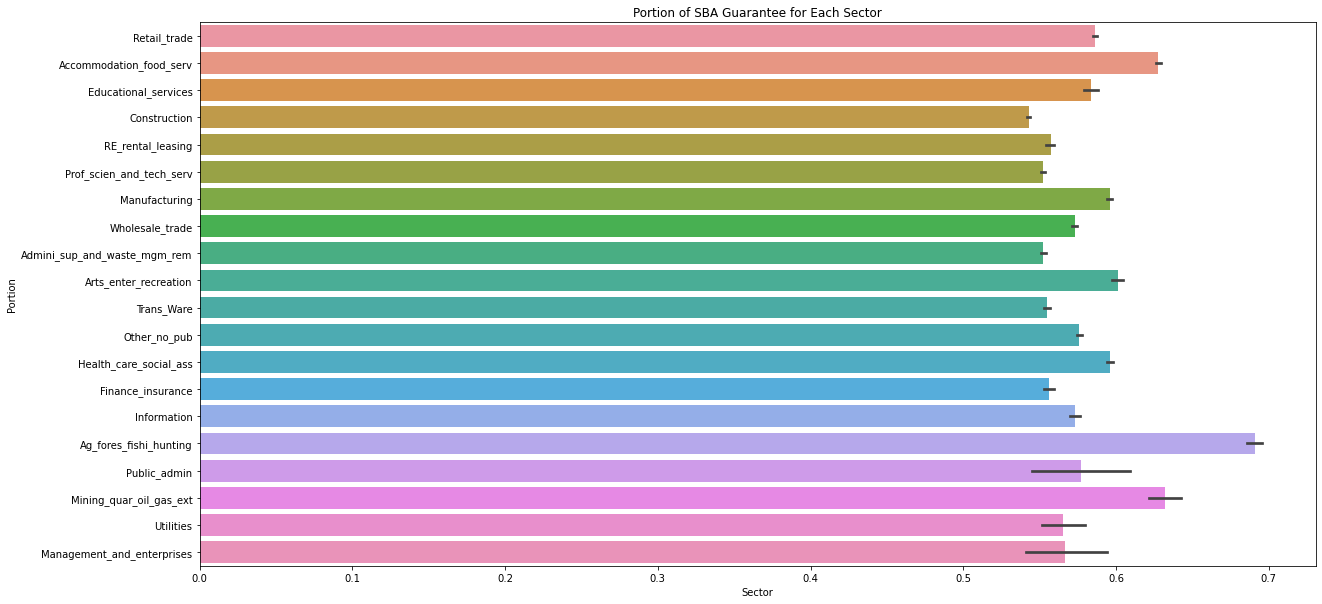

In [64]:
# Visualisasi
plt.figure(figsize=(20,10))
sns.barplot(y=df['sector'], x=df['Portion'], orient='h')
plt.title('Portion of SBA Guarantee for Each Sector')
plt.xlabel('Sector')
plt.ylabel('Portion')
plt.show()

- Agriculture, forestry, fishing and hunting has highest mean of Portion that SBA guarantee around 69.07%

### Conclusion
- Percentage of borrower who pain in full (PIF) around 72.33% while borrower who charge off around 27.67%
- Loan backed up by real estate has lower CHGOFF (4.41%) rather than not backed up by real estate (28.51%)
- Whether the business was Existing Business or New Business, both of them has same risk of CHGOFF
- Most of CHGOFF come from Urban with percentage 86.24%
- Small busines with revolving line of credit has lower risk of default loan with percentage 26.26%
- Mostly for small business that has default loan (CHGOFF) didn't come from LowDoc. The percentage of LowDoc that CHGOFF only 15.44%
- CHGOFF with low DisbursementGross has higher percentage 30.67% rather than high DisbursementGross. Its means that mostly CHGOFF come from small business with low DisbursementGross
- Year with highest number of loan was 2007 (17.07%), followed by 2006(16.64%) and 2005(14.15%)
- Year where has highest Percentage of default loan was 2008 (46.41%), followed by 2007(46.02%)
- Mostly small business that CHGOFF come from different State with percentage 77.98%
- Agriculture, forestry, fishing and hunting has highest mean of Portion that SBA guarantee
- Sector Feature
    - Retail trade and Manufacturing has significantly loan disbursement compare to another sector
    - Mining, quarrying, and oil and gas extraction  has highest median of Gross amount of loan approved by bank around 100000.0, followed by Agriculture, forestry, fishing and hunting 
    - Sector that has highest default was Real estate and rental and leasing (37.51%), followed by Finance and Insurance (34.91%) and Transportation and warehousing (31.44%)


### Recommendation
Here are some suggestion to reduce the risk of default:
- Small Business with low amount disbursement, term less than 240 month, and come from sector Real estate and rental and leasing should more get attention by lender. Lender could recommend counseling to Business owners through SBA Program to make reduce the risk of default in future.
- Lender should more pay attention to Small Business location to prevent default due to different State. When the borrowers has different State with Lender, lender could offer another lender that has same State.
